# Implementation

Several Python libraries allow for easy and efficient implementation of neural networks. Here, we'll show examples with the very popular `tf.keras` submodule. This submodule integrates Keras, a user-friendly high-level API, into Tensorflow, a lower-level backend. Let's start by loading Tensorflow, our visualization packages, and the {doc}`Boston </content/appendix/data>` housing dataset from `scikit-learn`. 

In [13]:
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

boston = datasets.load_boston()
X_boston = boston['data']
y_boston = boston['target']


Neural networks in Keras can be fit through one of two APIs: the *sequential* or the *functional* API. For the type of models discussed in this chapter, either approach works. 

## 1. The Sequential API

Fitting a network with the Keras sequential API can be broken down into four steps: 

1. Instantiate model
2. Add layers
3. Compile model (and summarize)
4. Fit model

An example of the code for these four steps is shown below. We first instantiate the network using `tf.keras.models.Sequential()`. 

Next, we add layers to the network. Specifically, we have to add any hidden layers we like followed by a single output layer. The type of networks covered in this chapter use only `Dense` layers. A "dense" layer is one in which each neuron is a function of all the other neurons in the previous layer. We identify the number of neurons in the layer with the `units` argument and the activation function applied to the layer with the `activation` argument. For the first layer only, we must also identify the `input_shape`, or the number of neurons in the input layer. If our predictors are of length `D`, the input shape will be `(D, )` (which is the shape of a single observation, as we can see with `X[0].shape`).

The next step is to compile the model. Compiling determines the configuration of the model; we specify the optimizer and loss function to be used as well as any metrics we would like to monitor. After compiling, we can also preview our model with `model.summary()`.

Finally, we fit the model. Here is where we actually provide our training data. Two other important arguments are `epochs` and `batch_size`. Models in Keras are fit with *mini-batch gradient descent*, in which samples of the training data are looped through and individually used to calculate and update gradients. `batch_size` determines the size of these samples, and `epochs` determines how many times the gradient is calculated for each sample. 


In [25]:
## 1. Instantiate
model = tf.keras.models.Sequential(name = 'Sequential_Model')

## 2. Add Layers
model.add(tf.keras.layers.Dense(units = 8,
                                activation = 'relu',
                                input_shape = (X_boston.shape[1], ),
                                name = 'hidden'))
model.add(tf.keras.layers.Dense(units = 1,
                                activation = 'linear',
                                name = 'output'))

## 3. Compile (and summarize)
model.compile(optimizer = 'adam', loss = 'mse')
print(model.summary())

## 4. Fit
model.fit(X_boston, y_boston, epochs = 100, batch_size = 1, validation_split=0.2, verbose = 0);

Model: "Sequential_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 8)                 112       
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


Predictions with the model built above are shown below.

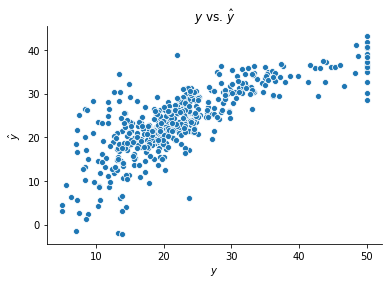

In [27]:
# Create Predictions
yhat_boston = model.predict(X_boston)[:,0]

# Plot
fig, ax = plt.subplots()
sns.scatterplot(y_boston, yhat_boston)
ax.set(xlabel = r"$y$", ylabel = r"$\hat{y}$", title = r"$y$ vs. $\hat{y}$")
sns.despine()

## 2. The Functional API

Fitting models with the Functional API can again be broken into four steps, listed below.

1. Define layers
2. Define model
3. Compile model (and summarize)
4. Fit model

While the sequential approach first defines the model and then adds layers, the functional approach does the opposite. We start by adding an input layer using `tf.keras.Input()`. Next, we add one or more hidden layers using `tf.keras.layers.Dense()`. Note that in this approach, we link layers directly. For instance, we indicate that the `hidden` layer below follows the `inputs` layer by adding `(inputs)` to the end of its definition. 

After creating the layers, we can define our model. We do this by using `tf.keras.Model()` and identifying the input and output layers. Finally, we compile and fit our model as in the sequential API. 

In [29]:
## 1. Define layers
inputs = tf.keras.Input(shape = (X_boston.shape[1],), name = "input")
hidden = tf.keras.layers.Dense(8, activation = "relu", name = "first_hidden")(inputs)
outputs = tf.keras.layers.Dense(1, activation = "linear", name = "output")(hidden)

## 2. Model
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = "Functional_Model")

## 3. Compile (and summarize)
model.compile(optimizer = "adam", loss = "mse")
print(model.summary())

## 4. Fit
model.fit(X_boston, y_boston, epochs = 100, batch_size = 1, validation_split=0.2, verbose = 0);

Model: "Functional_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
first_hidden (Dense)         (None, 8)                 112       
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


Predictions formed with this model are shown below. 

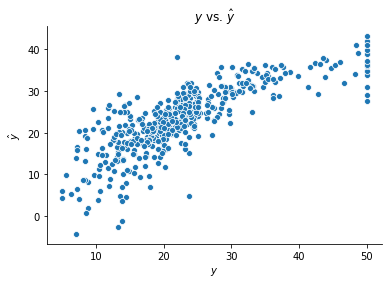

In [11]:
# Create Predictions
yhat_boston = model.predict(X_boston)[:,0]

# Plot
fig, ax = plt.subplots()
sns.scatterplot(y_boston, yhat_boston)
ax.set(xlabel = r"$y$", ylabel = r"$\hat{y}$", title = r"$y$ vs. $\hat{y}$")
sns.despine()